# Script for calculating steady state 1D advection-diffusion using FDM methods

In [12]:
import numpy as np
import numpy.matlib
from scipy.linalg import solve
from scipy.sparse import spdiags
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [13]:
# model parameters
c       = 20
k       = 2
nx      = 11
x0      = 0
x1      = 1

Tleft   = 0
Tright  = 1

X,dx    = np.linspace(x0,x1, nx, retstep=True)

#peclet number for stability analysis
peclet  = c*dx/(2*k)

#analytical solution with boundary conditions T(0) = 0 and T(1) = 1;
C2      = 1/(1-np.exp(c/k))
C1      = -C2;
Tana    = C1*np.exp(c/k*X) + C2

In [14]:
# hide: the code in this cell is hidden by the author

In [15]:
## FTCS solution
## build the coefficient matrix
#data  = (np.ones((nx,1))*np.array([???, ???, ??? ])).T
#diags = np.array([-1, 0, 1])
#A     = spdiags(data, diags, nx, nx).toarray()

## and add boundary conditions
#A[0,0]       = 1
#A[0,1]       = 0
#A[nx-1,nx-1] = 1
#A[nx-1,nx-2] = 0
#Rhs          = np.zeros(nx)
#Rhs[0]       = Tleft
#Rhs[-1]       = Tright
#Tftcs=solve(A,Rhs)

In [16]:
# hide: the code in this cell is hidden by the author

In [17]:
## upwind solution
## build the coefficient matrix
#data  = (np.ones((nx,1))*np.array([???, ???,  -???])).T
#diags = np.array([-1, 0, 1])
#A     = spdiags(data, diags, nx, nx).toarray()

## and add boundary conditions
#A[0,0]       = 1
#A[0,1]       = 0
#A[nx-1,nx-1] = 1
#A[nx-1,nx-2] = 0
#Tuw=solve(A,Rhs)

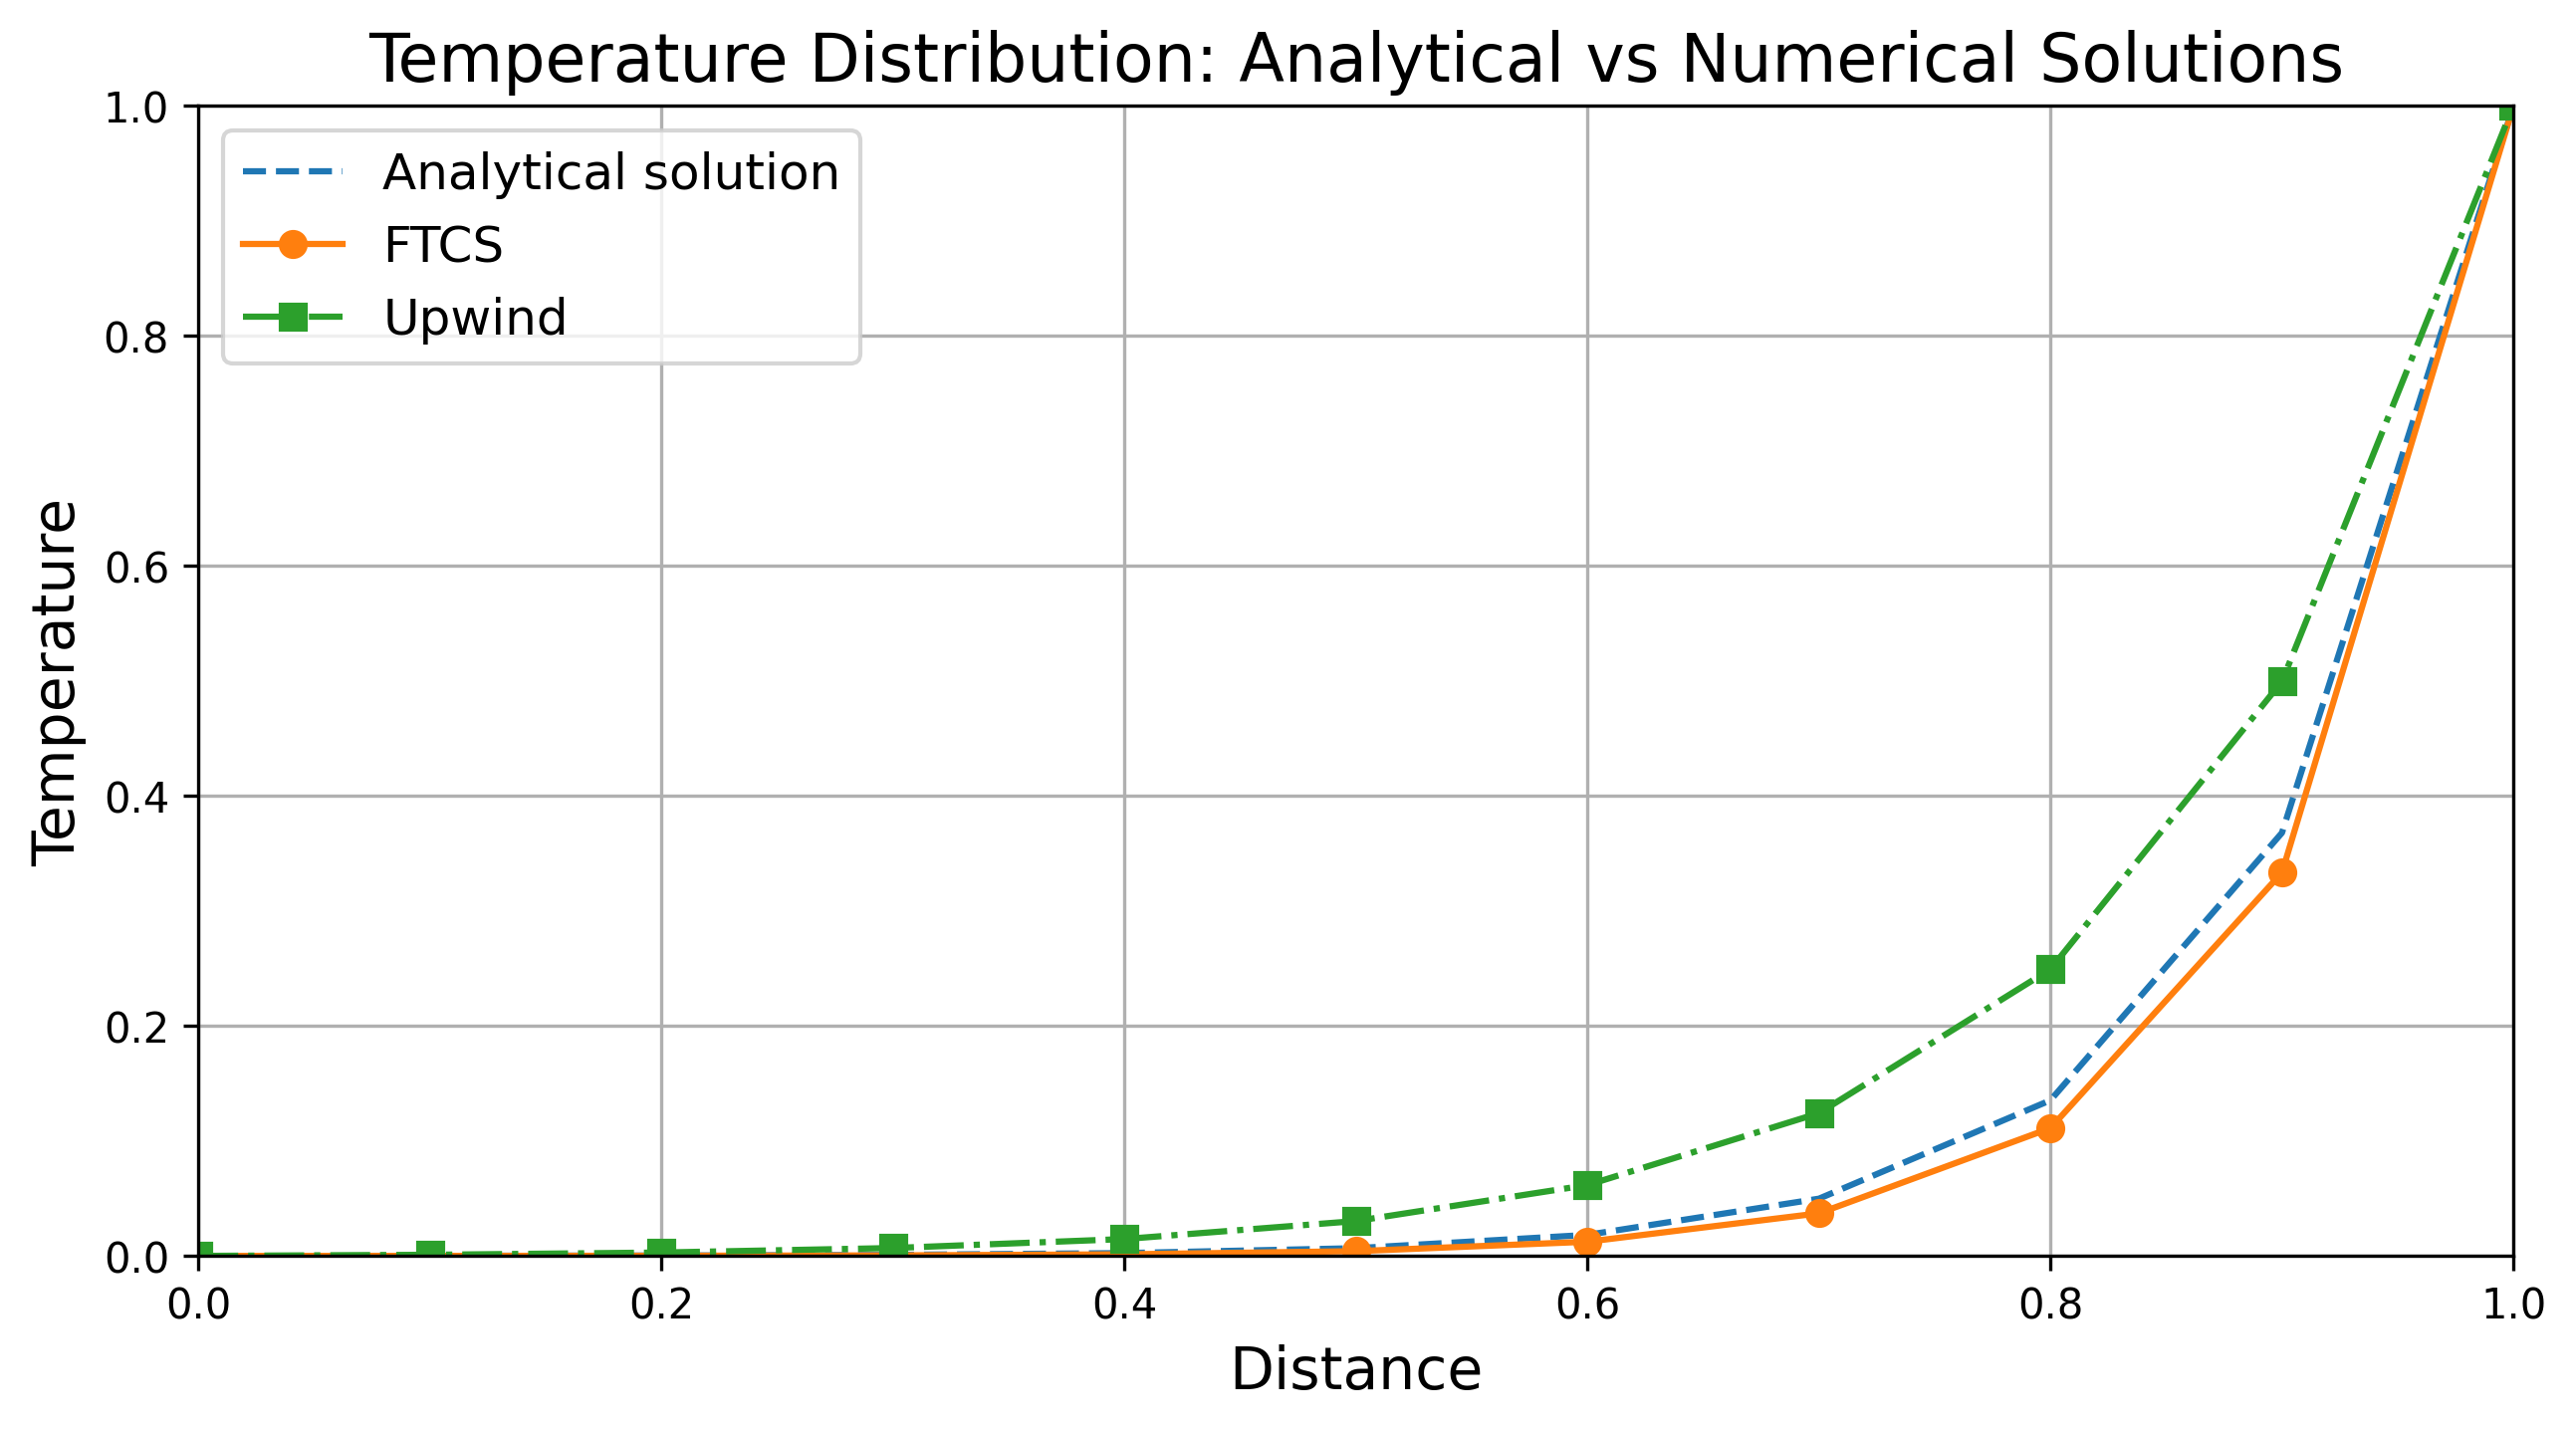

In [18]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Set axis limits
ax.set_xlim(x0, x1)
ax.set_ylim(min(Tleft, Tright, Tana.min(), Tftcs.min(), Tuw.min()), max(Tleft, Tright, Tana.max(), Tftcs.max(), Tuw.max()))

# Set axis labels
ax.set_xlabel('Distance', fontsize=14)
ax.set_ylabel('Temperature', fontsize=14)

# Plot the analytical and numerical solutions
ax.plot(X, Tana, label='Analytical solution', linestyle='--')
ax.plot(X, Tftcs, label='FTCS', linestyle='-', marker='o')
ax.plot(X, Tuw, label='Upwind', linestyle='-.', marker='s')

# Add a legend
ax.legend(fontsize=12)

# Add a title
ax.set_title('Temperature Distribution: Analytical vs Numerical Solutions', fontsize=16)

# Add a grid for better readability
ax.grid(True)

# Show the plot
plt.show()